---
$$ Heart Attack Prediction 
$$
$$NAMA : Fajar Dawud
$$

___

## BAB 1 - PENDAHULUAN

URL = 'https://www.kaggle.com/datasets/ankushpanday2/heart-attack-prediction-in-united-states'

Problem:

Kasus penyakit jantung menjadi salah satu penyebab utama kematian. Dengan adanya data tentang faktor risiko kesehatan dan gaya hidup, saya akan membuat machine learning dengan melihat perbandingan 5 model algoritma dan boosting, dan dengan matrix F1_Score yang mampu memprediksi kemungkinan seseorang mengalami serangan jantung. Model ini dapat membantu dalam deteksi dini dan pengambilan keputusan medis yang lebih baik.
- Bagi yang terkena prediksi serangan jantung, bisa diberikan saran penyembuhan dan diberi obat.
- Bagi yang tidak terkena prediksi serangan jantung, bisa diberi edukasi terkait kiat-kiat hidup sehat
- Semua saran yang diberikan dari project ini berdasarkan sumber dan artikel yang terpercaya

Justifikasi :
- 'https://www.halodoc.com/kesehatan-jantung'
- 'https://doktersehat.com/informasi/penyakit-jantung/penyebab-penyakit-jantung'

Objektif :

Memprediksi se akurat mungkin dengan meminimalisir error.

User :

1. Dokter & Tenaga Medis.

Membantu dokter dalam menganalisis risiko serangan jantung pasien berdasarkan riwayat kesehatan dan faktor risiko mereka.
Memungkinkan intervensi medis lebih awal untuk pasien berisiko tinggi.

2. Lembaga Kesehatan Masyarakat.

Memanfaatkan prediksi model untuk mengidentifikasi pola kesehatan di populasi tertentu dan menerapkan kebijakan pencegahan yang lebih efektif.

## BAB 2 - IMPORT LIBRARY

In [41]:
!pip install phik

In [87]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import phik
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## BAB 3 - DATA LOADING

In [43]:
df_ori = pd.read_csv('heart_attack_dataset.csv')
df = df_ori.copy()
df

,Age,Gender,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,...,ExerciseInducedAngina,Slope,NumberOfMajorVessels,Thalassemia,PreviousHeartAttack,StrokeHistory,Residence,EmploymentStatus,MaritalStatus,Outcome
0,31,Male,194,162,71,22.9,0,1,0,0,...,Yes,Downsloping,1,Normal,0,0,Suburban,Retired,Single,No Heart Attack
1,69,Male,208,148,93,33.9,1,1,0,0,...,Yes,Upsloping,2,Normal,0,0,Suburban,Unemployed,Married,No Heart Attack
2,34,Female,132,161,94,34.0,0,0,1,1,...,Yes,Upsloping,0,Normal,1,0,Rural,Retired,Single,Heart Attack
3,53,Male,268,134,91,35.0,0,1,1,0,...,Yes,Flat,0,Reversible defect,1,0,Suburban,Retired,Widowed,No Heart Attack
4,57,Female,203,140,75,30.1,0,1,0,0,...,Yes,Flat,0,Fixed defect,1,0,Rural,Retired,Married,Heart Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372969,49,Female,285,131,79,27.6,0,1,1,1,...,Yes,Flat,2,Fixed defect,1,0,Urban,Employed,Married,No Heart Attack
372970,77,Male,197,159,64,33.5,0,1,0,1,...,No,Downsloping,3,Fixed defect,0,1,Urban,Employed,Married,Heart Attack
372971,53,Female,243,94,84,34.7,1,1,1,0,...,Yes,Flat,3,Reversible defect,1,1,Urban,Retired,Married,Heart Attack
372972,78,Female,291,93,78,29.3,1,1,0,1,...,Yes,Upsloping,1,Fixed defect,0,0,Urban,Employed,Married,No Heart Attack


In [44]:
df['PreviousHeartAttack'].unique()

array([0, 1], dtype=int64)

In [45]:
df.head()

,Age,Gender,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,...,ExerciseInducedAngina,Slope,NumberOfMajorVessels,Thalassemia,PreviousHeartAttack,StrokeHistory,Residence,EmploymentStatus,MaritalStatus,Outcome
0,31,Male,194,162,71,22.9,0,1,0,0,...,Yes,Downsloping,1,Normal,0,0,Suburban,Retired,Single,No Heart Attack
1,69,Male,208,148,93,33.9,1,1,0,0,...,Yes,Upsloping,2,Normal,0,0,Suburban,Unemployed,Married,No Heart Attack
2,34,Female,132,161,94,34.0,0,0,1,1,...,Yes,Upsloping,0,Normal,1,0,Rural,Retired,Single,Heart Attack
3,53,Male,268,134,91,35.0,0,1,1,0,...,Yes,Flat,0,Reversible defect,1,0,Suburban,Retired,Widowed,No Heart Attack
4,57,Female,203,140,75,30.1,0,1,0,0,...,Yes,Flat,0,Fixed defect,1,0,Rural,Retired,Married,Heart Attack


In [46]:
df.shape

(372974, 32)

In [47]:
df.duplicated().sum()

0

In [48]:
df.isnull().sum().sum()

0

- Tidak ada missing value
- Tidak ada data yang terduplikat

## BAB 4 -- EXPLORATORY DATA ANALYST (EDA)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372974 entries, 0 to 372973
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Age                    372974 non-null  int64  
 1   Gender                 372974 non-null  object 
 2   Cholesterol            372974 non-null  int64  
 3   BloodPressure          372974 non-null  int64  
 4   HeartRate              372974 non-null  int64  
 5   BMI                    372974 non-null  float64
 6   Smoker                 372974 non-null  int64  
 7   Diabetes               372974 non-null  int64  
 8   Hypertension           372974 non-null  int64  
 9   FamilyHistory          372974 non-null  int64  
 10  PhysicalActivity       372974 non-null  int64  
 11  AlcoholConsumption     372974 non-null  int64  
 12  Diet                   372974 non-null  object 
 13  StressLevel            372974 non-null  int64  
 14  Ethnicity              372974 non-nu

- Drop unused columns

In [50]:
df.drop(columns=['Ethnicity', 'EducationLevel', 'Income', 'Residence', 'EmploymentStatus', 'MaritalStatus', 'PhysicalActivity'],inplace=True)

- Kolom target ('Outcome') masih berbentuk object, maka saya akan ubah menjadi integer

In [51]:
df['Outcome'] = df['Outcome'].map({'No Heart Attack': 0, 'Heart Attack': 1})

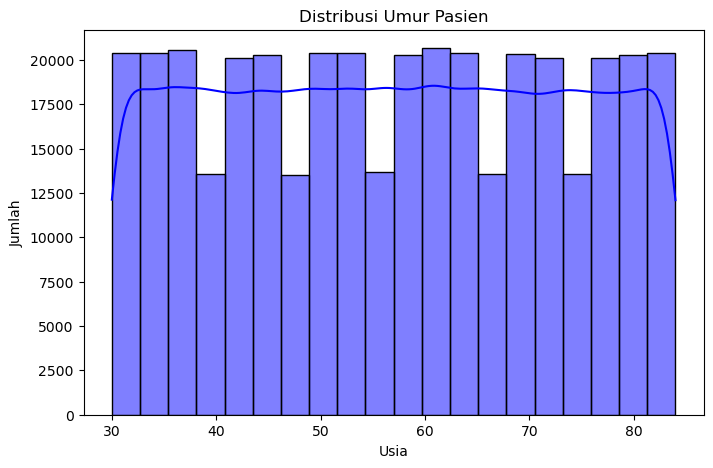

In [138]:
plt.figure(figsize=(8, 5))
sns.histplot(df_ori['Age'], bins=20, kde=True, color='blue')
plt.title('Distribusi Umur Pasien')
plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.show()

- Di dalam data terlihat rentang umur berada di 30-80 tahum yang mennjukkan orang dewasa sampai manula

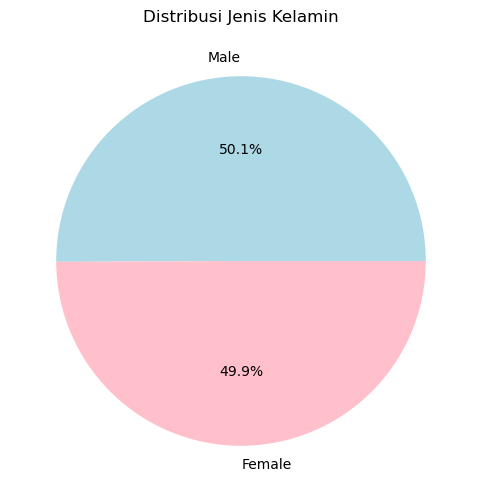

In [140]:
plt.figure(figsize=(6, 6))
df_ori['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Distribusi Jenis Kelamin')
plt.ylabel('')
plt.show()

- Jumlah gender hampir seimbang antara laki-laki dan perempuan

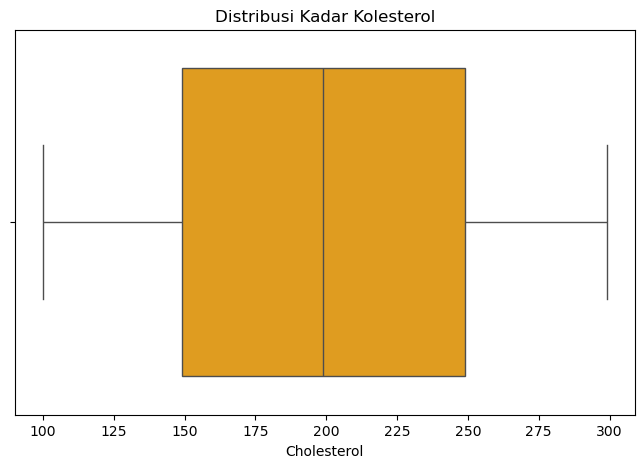

In [144]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_ori['Cholesterol'], color='orange')
plt.title('Distribusi Kadar Kolesterol')
plt.show()


- Kadar kolestrol orang-orang di dalam data ini berada di rentang 150-250

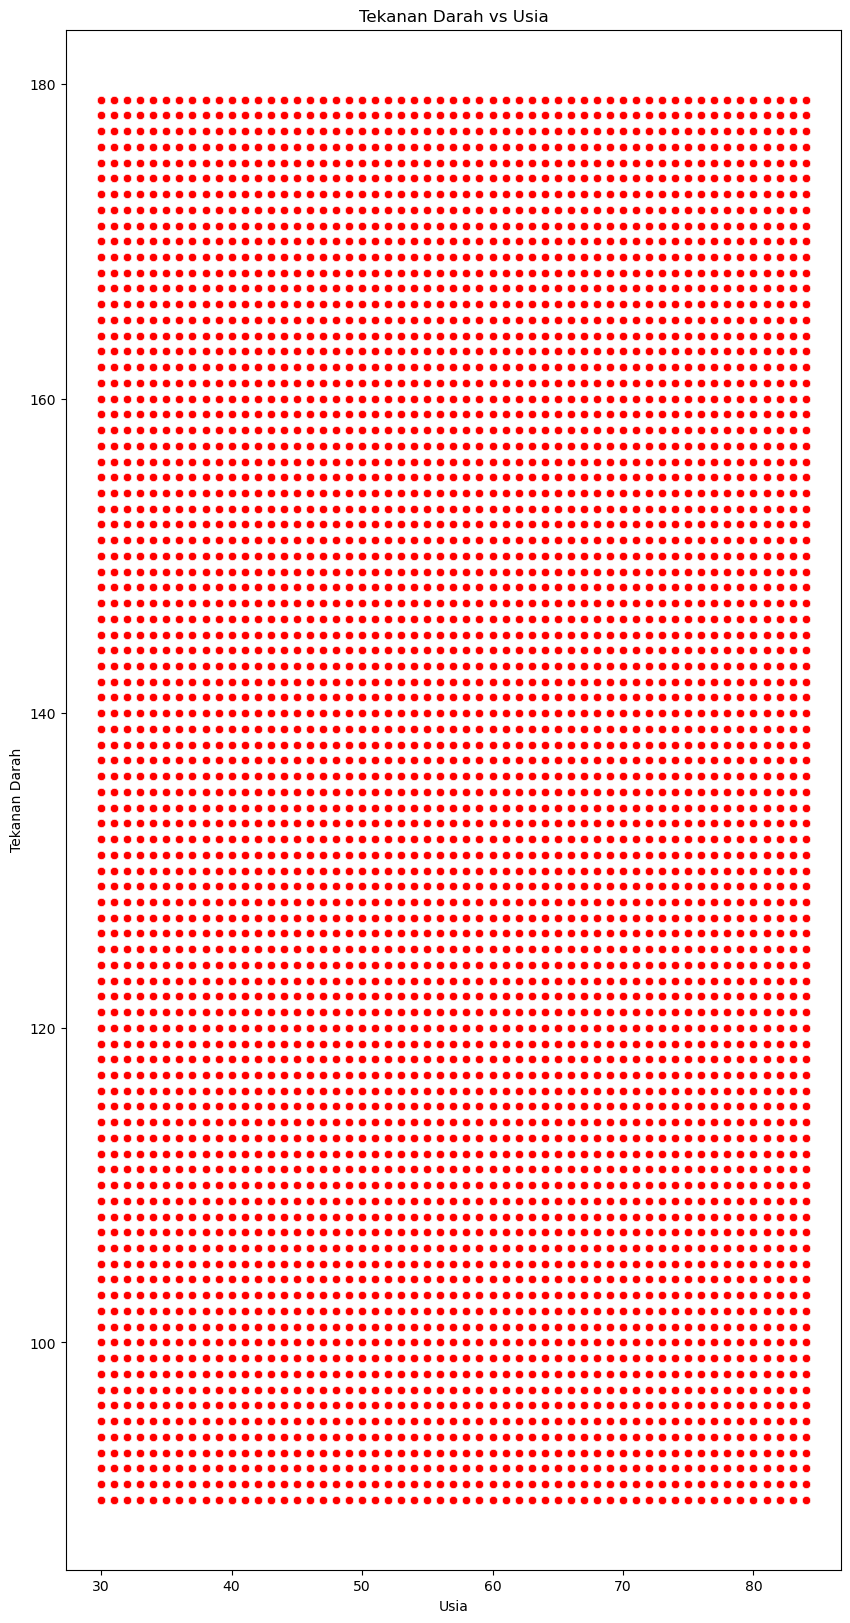

In [149]:
plt.figure(figsize=(10, 20))
sns.scatterplot(x=df_ori['Age'], y=df_ori['BloodPressure'], color='red')
plt.title('Tekanan Darah vs Usia')
plt.xlabel('Usia')
plt.ylabel('Tekanan Darah')
plt.show()


- Dari visualisasi di atas dapat dilihat bahwa hampir setiap usia memenuhi tekanan darah di tingkat nya masing-masing.

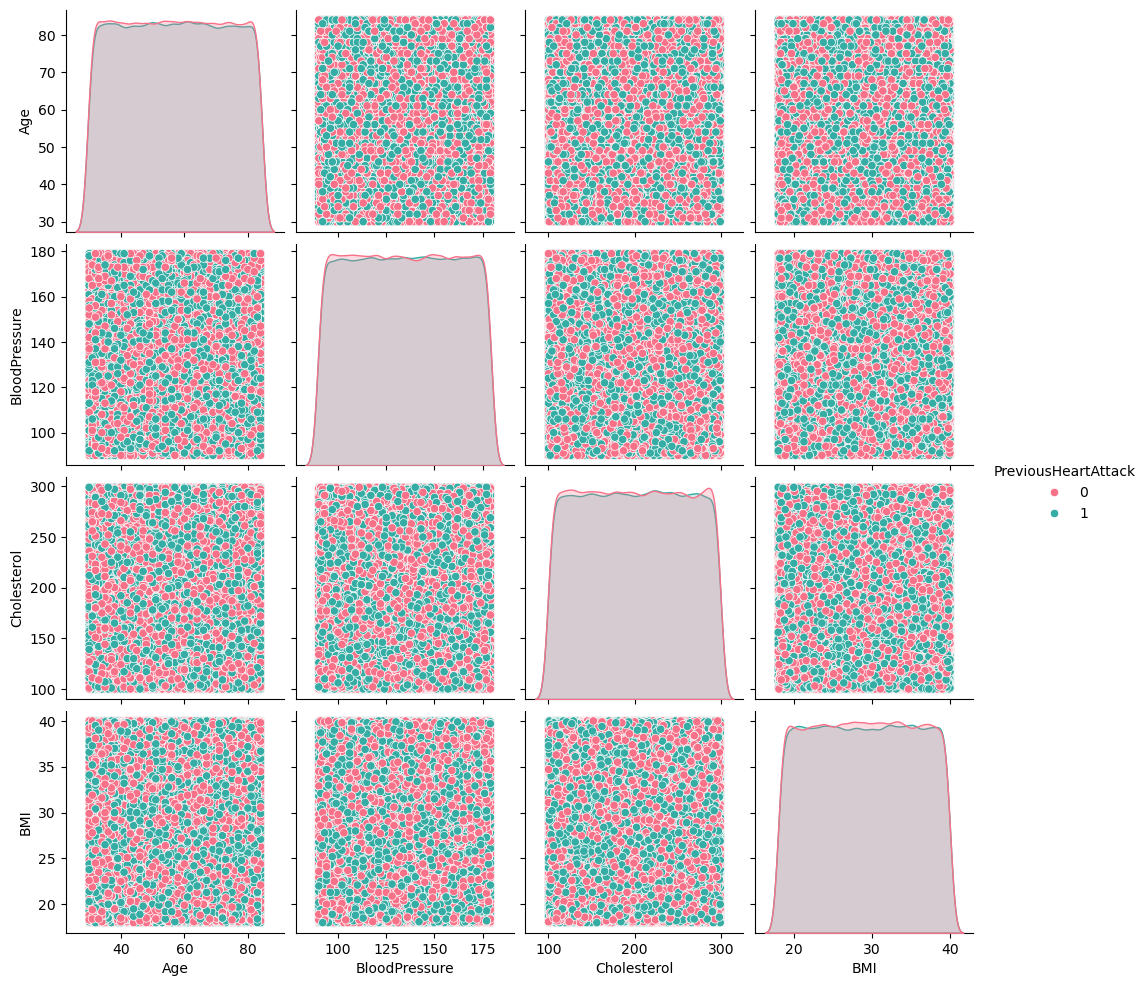

In [156]:
sns.pairplot(df_ori[['Age', 'BloodPressure', 'Cholesterol', 'BMI', 'PreviousHeartAttack']], hue='PreviousHeartAttack', palette='husl')
plt.show()

## BAB 5 - FEATURE ENGINEERING

- Saya ubah kolom target `Outcome` yang awalnya object menjadi integer

In [52]:
X = df.drop(['Outcome'],axis=1) # mengambil data selain kolom Outcome
y = df.Outcome # mengambil data kolom Outcome
y

0         0
1         0
2         1
3         0
4         1
         ..
372969    0
372970    1
372971    1
372972    0
372973    1
Name: Outcome, Length: 372974, dtype: int64

'Smoker', 'Diabetes', 'Hypertension', 'FamilyHistory',  'PreviousHeartAttack', 'StrokeHistory'

In [53]:
X

,Age,Gender,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,...,ChestPainType,ECGResults,MaxHeartRate,ST_Depression,ExerciseInducedAngina,Slope,NumberOfMajorVessels,Thalassemia,PreviousHeartAttack,StrokeHistory
0,31,Male,194,162,71,22.9,0,1,0,0,...,Typical,ST-T abnormality,173,0.52,Yes,Downsloping,1,Normal,0,0
1,69,Male,208,148,93,33.9,1,1,0,0,...,Atypical,LV hypertrophy,189,3.79,Yes,Upsloping,2,Normal,0,0
2,34,Female,132,161,94,34.0,0,0,1,1,...,Non-anginal,Normal,122,0.17,Yes,Upsloping,0,Normal,1,0
3,53,Male,268,134,91,35.0,0,1,1,0,...,Atypical,ST-T abnormality,104,0.67,Yes,Flat,0,Reversible defect,1,0
4,57,Female,203,140,75,30.1,0,1,0,0,...,Typical,ST-T abnormality,126,5.00,Yes,Flat,0,Fixed defect,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372969,49,Female,285,131,79,27.6,0,1,1,1,...,Non-anginal,Normal,172,0.17,Yes,Flat,2,Fixed defect,1,0
372970,77,Male,197,159,64,33.5,0,1,0,1,...,Asymptomatic,LV hypertrophy,147,1.73,No,Downsloping,3,Fixed defect,0,1
372971,53,Female,243,94,84,34.7,1,1,1,0,...,Asymptomatic,ST-T abnormality,154,3.15,Yes,Flat,3,Reversible defect,1,1
372972,78,Female,291,93,78,29.3,1,1,0,1,...,Atypical,LV hypertrophy,136,4.21,Yes,Upsloping,1,Fixed defect,0,0


- Split between numerical and categorical column

In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372974 entries, 0 to 372973
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Age                    372974 non-null  int64  
 1   Gender                 372974 non-null  object 
 2   Cholesterol            372974 non-null  int64  
 3   BloodPressure          372974 non-null  int64  
 4   HeartRate              372974 non-null  int64  
 5   BMI                    372974 non-null  float64
 6   Smoker                 372974 non-null  int64  
 7   Diabetes               372974 non-null  int64  
 8   Hypertension           372974 non-null  int64  
 9   FamilyHistory          372974 non-null  int64  
 10  AlcoholConsumption     372974 non-null  int64  
 11  Diet                   372974 non-null  object 
 12  StressLevel            372974 non-null  int64  
 13  Medication             372974 non-null  object 
 14  ChestPainType          372974 non-nu

In [55]:
X.columns

Index(['Age', 'Gender', 'Cholesterol', 'BloodPressure', 'HeartRate', 'BMI',
       'Smoker', 'Diabetes', 'Hypertension', 'FamilyHistory',
       'AlcoholConsumption', 'Diet', 'StressLevel', 'Medication',
       'ChestPainType', 'ECGResults', 'MaxHeartRate', 'ST_Depression',
       'ExerciseInducedAngina', 'Slope', 'NumberOfMajorVessels', 'Thalassemia',
       'PreviousHeartAttack', 'StrokeHistory'],
      dtype='object')

In [56]:
df['Thalassemia'].unique()

array(['Normal', 'Reversible defect', 'Fixed defect'], dtype=object)

In [57]:
# myimpanpan nama kolom yang numerik data
num_col = ['Age', 'Cholesterol', 'BloodPressure', 'HeartRate', 'BMI', 'MaxHeartRate','ST_Depression']
# menyimpan nama kolom yang kategorikal data
cat_col_ordinal = ['AlcoholConsumption','StressLevel','NumberOfMajorVessels','Smoker', 'Diabetes', 'Hypertension','FamilyHistory', 'PreviousHeartAttack','StrokeHistory'] # berisi kolom hierarki
cat_col_onehot = ['Gender','Diet','Medication', 'ChestPainType', 'ECGResults','ExerciseInducedAngina', 'Slope', 'Thalassemia']

- Cardinality handling

In [58]:
# perulangan di dalam kolom kategori
for i in cat_col_onehot:
    print(f'Jumlah unique value dari kolom {i} : {X[i].nunique()}') # menghitung data yg unik dari kolom kategori
    print(f'Unique value dari kolom {i} : {X[i].unique()}') # menampilkan data kategori yang unik
    print('')

Jumlah unique value dari kolom Gender : 2
Unique value dari kolom Gender : ['Male' 'Female']

Jumlah unique value dari kolom Diet : 3
Unique value dari kolom Diet : ['Unhealthy' 'Healthy' 'Moderate']

Jumlah unique value dari kolom Medication : 2
Unique value dari kolom Medication : ['Yes' 'No']

Jumlah unique value dari kolom ChestPainType : 4
Unique value dari kolom ChestPainType : ['Typical' 'Atypical' 'Non-anginal' 'Asymptomatic']

Jumlah unique value dari kolom ECGResults : 3
Unique value dari kolom ECGResults : ['ST-T abnormality' 'LV hypertrophy' 'Normal']

Jumlah unique value dari kolom ExerciseInducedAngina : 2
Unique value dari kolom ExerciseInducedAngina : ['Yes' 'No']

Jumlah unique value dari kolom Slope : 3
Unique value dari kolom Slope : ['Downsloping' 'Upsloping' 'Flat']

Jumlah unique value dari kolom Thalassemia : 3
Unique value dari kolom Thalassemia : ['Normal' 'Reversible defect' 'Fixed defect']



In [59]:
for i in cat_col_ordinal:
    print(f'Jumlah unique value dari kolom {i} : {X[i].nunique()}') # menghitung data yg unik dari kolom kategori
    print(f'Unique value dari kolom {i} : {X[i].unique()}') # menampilkan data kategori yang unik
    print('')

Jumlah unique value dari kolom AlcoholConsumption : 5
Unique value dari kolom AlcoholConsumption : [0 2 3 1 4]

Jumlah unique value dari kolom StressLevel : 9
Unique value dari kolom StressLevel : [1 6 3 4 5 2 9 8 7]

Jumlah unique value dari kolom NumberOfMajorVessels : 4
Unique value dari kolom NumberOfMajorVessels : [1 2 0 3]

Jumlah unique value dari kolom Smoker : 2
Unique value dari kolom Smoker : [0 1]

Jumlah unique value dari kolom Diabetes : 2
Unique value dari kolom Diabetes : [1 0]

Jumlah unique value dari kolom Hypertension : 2
Unique value dari kolom Hypertension : [0 1]

Jumlah unique value dari kolom FamilyHistory : 2
Unique value dari kolom FamilyHistory : [0 1]

Jumlah unique value dari kolom PreviousHeartAttack : 2
Unique value dari kolom PreviousHeartAttack : [0 1]

Jumlah unique value dari kolom StrokeHistory : 2
Unique value dari kolom StrokeHistory : [0 1]



- Semua kolom categorikal sudah termasuk low cardinality

- Split antara Train Set dan Test Set

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
print('Train Size: ', X_train.shape) # menampilkan dimensi data
print('Test Size: ', X_test.shape) # menampilkan dimensi data

Train Size:  (298379, 24)
Test Size:  (74595, 24)


# Handling Missing value

In [61]:
df.isnull().sum()

Age                      0
Gender                   0
Cholesterol              0
BloodPressure            0
HeartRate                0
BMI                      0
Smoker                   0
Diabetes                 0
Hypertension             0
FamilyHistory            0
AlcoholConsumption       0
Diet                     0
StressLevel              0
Medication               0
ChestPainType            0
ECGResults               0
MaxHeartRate             0
ST_Depression            0
ExerciseInducedAngina    0
Slope                    0
NumberOfMajorVessels     0
Thalassemia              0
PreviousHeartAttack      0
StrokeHistory            0
Outcome                  0
dtype: int64

- Tidak ada missing value

# Handling Outlier

cek nilai skewnes untuk numerikal kolom

In [62]:
# Create function to check skewness
def check_skewness(df, *column_names):
    return {col: df[col].skew() for col in column_names if col in df.columns}

In [63]:
skewness_results = check_skewness(X_train, 'Cholesterol', 'BloodPressure', 'HeartRate', 'BMI', 'MaxHeartRate','ST_Depression')

# Print skewness
for col, skewness in skewness_results.items():
    print(f"{col}: {skewness}")

Cholesterol: 0.0022945589439571598
BloodPressure: -0.0013145260158480493
HeartRate: 0.0021471918828177864
BMI: -0.0016595965534932384
MaxHeartRate: 0.0018759342868087997
ST_Depression: -0.003961254145235427


- Lalu saya klasifikasi kan apakah normal/skew/extreme dengan looping

In [64]:
# Initialize empty lists for each skewness category
normal_columns = []
skewed_columns = []
extreme_skewed_columns = []

# Loop through the skewness values and categorize the columns
for col, skewness in skewness_results.items():
    if skewness < -1.0 or skewness > 1.0:
        extreme_skewed_columns.append(col)
    elif abs(skewness) <= 0.5: # sama aja dgn -0.5 <= skewness <= 0.5
        normal_columns.append(col)
    else:
        skewed_columns.append(col)

# Print the columns in each category
print(f"Normal: {normal_columns}\nSkewed: {skewed_columns}\nExtreme Skewed: {extreme_skewed_columns}")

Normal: ['Cholesterol', 'BloodPressure', 'HeartRate', 'BMI', 'MaxHeartRate', 'ST_Depression']
Skewed: []
Extreme Skewed: []


- Semua data terdistribusi normal

In [65]:
# Create function to calculate outlier percentages for normal distribution
def calculate_outlier_percentages_normal(df, columns):
    for variable in columns:
        std = df[variable].std()
        lower_boundary = df[variable].quantile(0.25) - (std * 3)
        upper_boundary = df[variable].quantile(0.75) + (std * 3)

        outliers = df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)]
        outlier_percentage = len(outliers) / len(df) * 100 # perhitungan persentase outlier

        print('Percentage of outliers in {}: {:.2f}%'.format(variable, outlier_percentage))
# Calcuate outlier percentages before handling
print(calculate_outlier_percentages_normal(X_train, normal_columns))

Percentage of outliers in Cholesterol: 0.00%
Percentage of outliers in BloodPressure: 0.00%
Percentage of outliers in HeartRate: 0.00%
Percentage of outliers in BMI: 0.00%
Percentage of outliers in MaxHeartRate: 0.00%
Percentage of outliers in ST_Depression: 0.00%
None


- Dengan visualisasi data dibawah ini

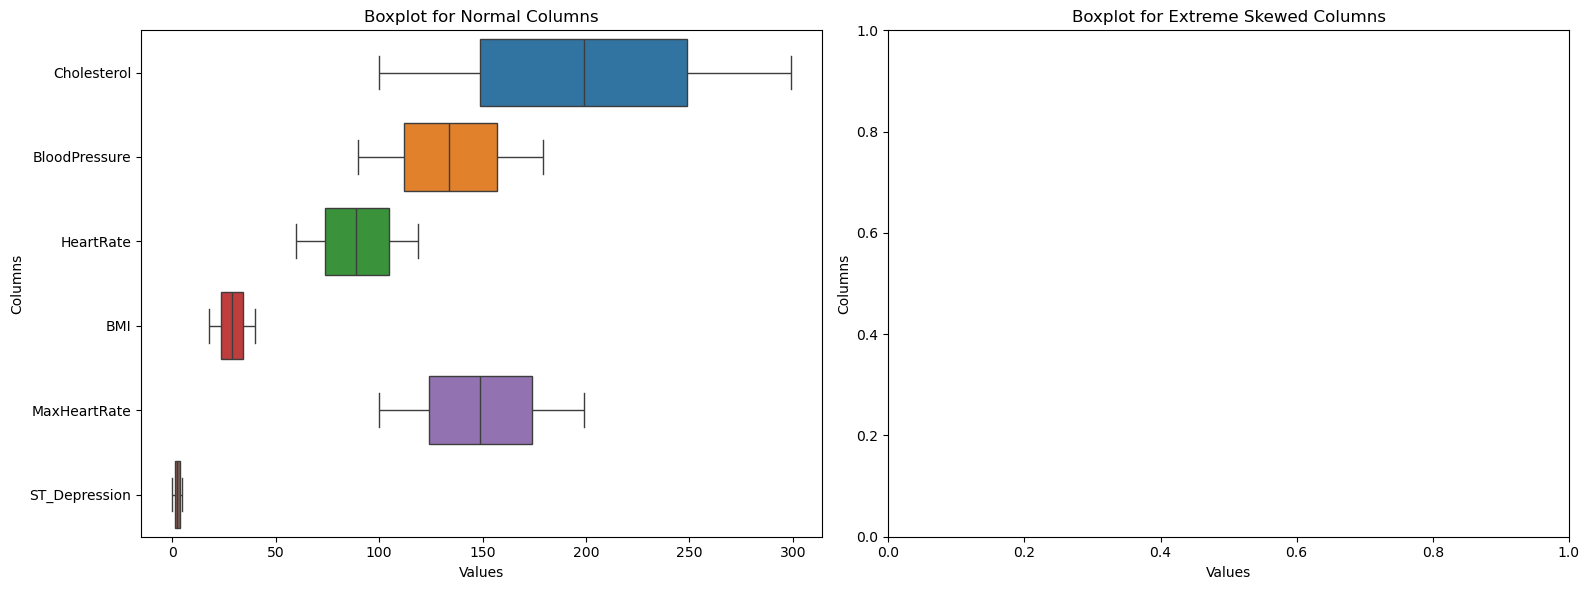

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # menampilkan grafik 1 baris 2 kolom

# Boxplot for skewed columns
sns.boxplot(data=X_train[normal_columns], orient="h", ax=axes[0])
axes[0].set_title("Boxplot for Normal Columns")
axes[0].set_xlabel("Values")
axes[0].set_ylabel("Columns")

# Boxplot for extreme skewed columns
sns.boxplot(data=X_train[extreme_skewed_columns], orient="h", ax=axes[1])
axes[1].set_title("Boxplot for Extreme Skewed Columns")
axes[1].set_xlabel("Values")
axes[1].set_ylabel("Columns")

# Display the plot
plt.tight_layout()
plt.show()

untuk handling outlier saya gunakan winsorizer dengan metode gaussian karena data terdistribusi normal

In [67]:
# Create function to apply winsorization for normal
def apply_winsorization_normal(train, variables, capping_method='gaussian', tail='both', fold=3):
    winsoriser = Winsorizer(capping_method=capping_method, tail=tail, fold=fold, variables=variables)
    train_capped = winsoriser.fit_transform(train)
    return train_capped

X_train = apply_winsorization_normal(X_train, normal_columns)

In [68]:
calculate_outlier_percentages_normal(X_train, normal_columns)

Percentage of outliers in Cholesterol: 0.00%
Percentage of outliers in BloodPressure: 0.00%
Percentage of outliers in HeartRate: 0.00%
Percentage of outliers in BMI: 0.00%
Percentage of outliers in MaxHeartRate: 0.00%
Percentage of outliers in ST_Depression: 0.00%


# FEATURE SELECTION

In [69]:
# Concatenate X_train and y_train
concat_train = pd.concat([X_train, y_train], axis=1) #menggabungkan data X_train dan y_train

# Show X_train
concat_train.head()

,Age,Gender,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,...,ECGResults,MaxHeartRate,ST_Depression,ExerciseInducedAngina,Slope,NumberOfMajorVessels,Thalassemia,PreviousHeartAttack,StrokeHistory,Outcome
146265,39,Female,125,106,99,23.5,0,0,0,1,...,ST-T abnormality,128,3.40,No,Upsloping,2,Reversible defect,1,0,0
260108,68,Female,291,112,79,22.9,1,0,0,1,...,LV hypertrophy,123,1.47,No,Flat,3,Fixed defect,1,1,1
366320,53,Female,284,91,75,27.7,1,0,0,1,...,LV hypertrophy,109,3.81,No,Upsloping,0,Normal,0,0,1
193355,72,Male,221,170,77,18.6,1,1,1,1,...,ST-T abnormality,193,0.13,No,Flat,1,Reversible defect,0,0,0
89720,71,Male,209,131,88,28.0,0,1,1,1,...,Normal,130,4.55,No,Downsloping,2,Fixed defect,1,1,0


In [70]:
concat_train.columns

Index(['Age', 'Gender', 'Cholesterol', 'BloodPressure', 'HeartRate', 'BMI',
       'Smoker', 'Diabetes', 'Hypertension', 'FamilyHistory',
       'AlcoholConsumption', 'Diet', 'StressLevel', 'Medication',
       'ChestPainType', 'ECGResults', 'MaxHeartRate', 'ST_Depression',
       'ExerciseInducedAngina', 'Slope', 'NumberOfMajorVessels', 'Thalassemia',
       'PreviousHeartAttack', 'StrokeHistory', 'Outcome'],
      dtype='object')

In [71]:
# Create function to correlate variables with default
def compute_phik_correlation(dataframe, columns, target):
    subset = dataframe[columns]
    correlation_matrix = subset.phik_matrix()
    return correlation_matrix[target]

# Define the list of columns for each subset
columns = ['Age', 'Gender', 'Cholesterol', 'BloodPressure', 'HeartRate', 'BMI',
       'Smoker', 'Diabetes', 'Hypertension', 'FamilyHistory',
       'AlcoholConsumption', 'Diet', 'StressLevel', 'Medication',
       'ChestPainType', 'ECGResults', 'MaxHeartRate', 'ST_Depression',
       'ExerciseInducedAngina', 'Slope', 'NumberOfMajorVessels', 'Thalassemia',
       'PreviousHeartAttack', 'StrokeHistory', 'Outcome']
target = ['Outcome']

# Compute Phi-K correlation for each set of columns and print
correlation = compute_phik_correlation(concat_train, columns, target)

# Print result
print(correlation)

interval columns not set, guessing: ['Age', 'Cholesterol', 'BloodPressure', 'HeartRate', 'BMI', 'Smoker', 'Diabetes', 'Hypertension', 'FamilyHistory', 'AlcoholConsumption', 'StressLevel', 'MaxHeartRate', 'ST_Depression', 'NumberOfMajorVessels', 'PreviousHeartAttack', 'StrokeHistory', 'Outcome']
                        Outcome
Age                    0.000000
Gender                 0.002533
Cholesterol            0.000000
BloodPressure          0.000000
HeartRate              0.007627
BMI                    0.005144
Smoker                 0.000000
Diabetes               0.000000
Hypertension           0.000000
FamilyHistory          0.000000
AlcoholConsumption     0.000000
Diet                   0.000000
StressLevel            0.000000
Medication             0.000000
ChestPainType          0.003974
ECGResults             0.000000
MaxHeartRate           0.000000
ST_Depression          0.000000
ExerciseInducedAngina  0.000000
Slope                  0.000000
NumberOfMajorVessels   0.000000


Saat dilakukan uji korelasi antara beberapa kolom, tidak menunjukkan adanya hubungan korelasi yang signifikan. 
Namun, berdasarkan data yang diperoleh dari [data ini,](https://www.alomedika.com/penyakit/kardiologi/infark-miokard-akut/diagnosis) diagnosis serangan jantung dapat ditegakkan melalui pengumpulan data klinis yang mendalam dan pemeriksaan penunjang yang komprehensif, yang mencakup beberapa tahapan penting, antara lain :

1. ANAMNESIS/Riwayat Pasien: 'Age', 'Gender',  dislipidemia/'Cholesterol',  'Smoker',  'Diabetes',  'Hypertension', 'FamilyHistory',  'AlcoholConsumption',  'Diet', 'StressLevel', 'ChestPainType', 'StrokeHistory', 'Medication', 'PreviousHeartAttack'

2. Pemeriksaan Fisik: 'BMI', 'BloodPressure', 'HeartRate',

3. Pemeriksaan penunjang: 'ECGResults', 'ST_Depression', 'ExerciseInducedAngina', 'NumberOfMajorVessels'


HAPUS 'Slope' 'Thalassemia

chestpain: bukan karena jantung, tapi karena asam lambung, gerd.

angina: ada masalah di jantung, penyempitan, penyumbatan dll

In [72]:
X_train.drop(['Thalassemia','Slope'], axis = 1, inplace = True) #cara 1


In [73]:
# myimpanpan nama kolom yang numerik data
num_col = ['Age', 'Cholesterol', 'BloodPressure', 'HeartRate', 'BMI', 'MaxHeartRate','ST_Depression']
# menyimpan nama kolom yang kategorikal data
cat_col_ordinal = ['AlcoholConsumption','StressLevel','NumberOfMajorVessels','Smoker', 'Diabetes', 'Hypertension','FamilyHistory', 'PreviousHeartAttack','StrokeHistory'] # berisi kolom hierarki
cat_col_onehot = ['Gender','Diet','Medication', 'ChestPainType', 'ECGResults','ExerciseInducedAngina']

## FEATURE SCALING DAN ENCODING

In [74]:
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# ColumnTransformer yang benar
preprocess = ColumnTransformer(
    transformers=[
        ('num', scaler, num_col),  # Scaling untuk numerik  # Encoding untuk ordinal
        ('cat_ohe', ohe, cat_col_onehot)  # OneHot Encoding untuk nominal
    ],
    remainder='passthrough' 
)

# BAB 6- MODEL DEFINITION

- Membuat pipeline

In [75]:
# Model Definition using pipeline
pipe_svc = Pipeline([
    ('preprocess', preprocess),  # Jika ada preprocessing sebelumnya
    ('classifier', SVC())  # Model yang digunakan
])

pipe_dt = Pipeline([
    ('preprocess', preprocess),
    ('classifier', DecisionTreeClassifier(random_state=10))
])

pipe_rf = Pipeline([
    ('preprocess', preprocess),
    ('classifier', RandomForestClassifier(random_state=10))
])

pipe_knn = Pipeline([
    ('preprocess', preprocess),
    ('classifier', KNeighborsClassifier())
])

pipe_ada = Pipeline([
    ('preprocess', preprocess),
    ('classifier', AdaBoostClassifier())
])

- cross validation untuk memilih best model

In [76]:
# setting kfold
skfold = StratifiedKFold(n_splits = 5)

In [77]:
cv_svm_model = cross_val_score(pipe_svc, X_train, y_train, cv = skfold, scoring='f1', n_jobs=-1)

In [78]:
cv_dt_model = cross_val_score(pipe_dt, X_train, y_train, cv = skfold, scoring='f1', n_jobs=-1)

In [79]:
cv_rf_model = cross_val_score(pipe_rf, X_train, y_train, cv = skfold, scoring='f1', n_jobs=-1)

In [80]:
cv_knn_model = cross_val_score(pipe_knn, X_train, y_train, cv = skfold, scoring='f1', n_jobs=-1)

In [81]:
cv_ada_model = cross_val_score(pipe_ada, X_train, y_train, cv = skfold, scoring='f1', n_jobs=-1)

In [82]:
# Finding Best Model based on Cross_Val_Score (mean)
name_model = []
cv_scores = 0
for cv,name in zip([cv_svm_model,cv_dt_model,cv_rf_model,cv_knn_model,cv_ada_model],
                   ['svm_model','dt_model','rf_model','knn_model','ada_model']):
  print(name)
  print('f1score - All - Cross Validation :', cv)
  print('f1score - Mean - Cross Validation :', cv.mean())
  print('f1score - std - Cross Validation :', cv.std())
  print('f1score - Range of Test Set :', (cv.mean()-cv.std()), '-' , (cv.mean()+cv.std()))
  print('-'*50)
  if cv.mean() > cv_scores:
    cv_scores = cv.mean()
    name_model = name
  else:
    pass
print('Best Model:', name_model)
print('Cross Val Mean from Best Model:', cv_scores)

svm_model
f1score - All - Cross Validation : [0.4627383  0.47057779 0.47136267 0.46966121 0.47103629]
f1score - Mean - Cross Validation : 0.4690752507852565
f1score - std - Cross Validation : 0.0032198086200778036
f1score - Range of Test Set : 0.4658554421651787 - 0.47229505940533434
--------------------------------------------------
dt_model
f1score - All - Cross Validation : [0.49942853 0.50068836 0.50697246 0.49912775 0.49844843]
f1score - Mean - Cross Validation : 0.5009331066288916
f1score - std - Cross Validation : 0.003105813408169382
f1score - Range of Test Set : 0.49782729322072217 - 0.504038920037061
--------------------------------------------------
rf_model
f1score - All - Cross Validation : [0.47553723 0.47573429 0.4760417  0.47529825 0.47702821]
f1score - Mean - Cross Validation : 0.4759279362423694
f1score - std - Cross Validation : 0.0006016985914381046
f1score - Range of Test Set : 0.4753262376509313 - 0.4765296348338075
------------------------------------------------

- Hasil dari pemilihan best model menunjukkan paling baik adalah decission Tree, maka akan saya tuning lagi supaya hasilnya bisa lebih optimal

- Decission tree

In [83]:
# Fit pipeline on the training data
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'Cholesterol',
                                                   'BloodPressure', 'HeartRate',
                                                   'BMI', 'MaxHeartRate',
                                                   'ST_Depression']),
                                                 ('cat_ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Diet',
                                                   'Medication',
                                                   'ChestPainType',
                                                   'ECGResults',
                                                   'ExerciseInducedAngina'])])),
                ('classifier', DecisionTreeClassifier(random_state=10))])

In [84]:
# Get predictions for both training and test data
y_pred_train = pipe_dt.predict(X_train)
y_pred_test = pipe_dt.predict(X_test)

# BAB 7 - MODEL TRAINING

In [85]:
from sklearn.metrics import f1_score
# Print recall score
print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train))
print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test))

F1 Score - Train Set  :  1.0
F1 Score - Test Set   :  0.5010312592076714


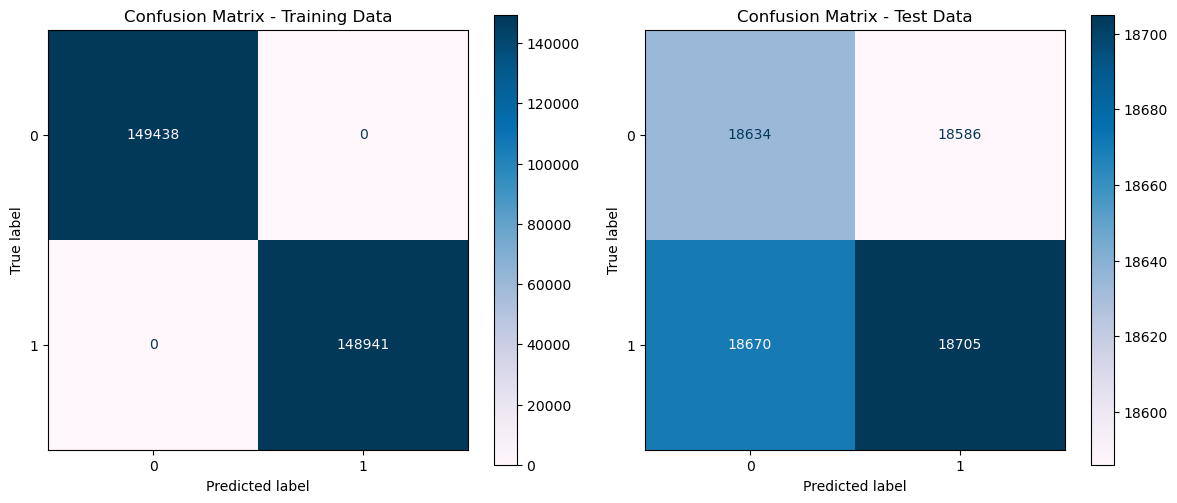

In [88]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix for training data
train_matrix = ConfusionMatrixDisplay.from_estimator(pipe_dt, X_train, y_train, cmap='PuBu', ax=axes[0])
train_matrix.ax_.set_title('Confusion Matrix - Training Data')

# Plot confusion matrix for test data
test_matrix = ConfusionMatrixDisplay.from_estimator(pipe_dt, X_test, y_test, cmap='PuBu', ax=axes[1])
test_matrix.ax_.set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()

# BAB 8 - MODEL EVALUATION

- Karena hasil nya buruk, maka saya akan mengoptimalkan supaya bisa menjadi baik

In [ ]:
# Create function to create reports
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
    # Calculate f1 scores
    score_reports = {
        'F1_score Train Set': f1_score(y_train, y_pred_train),
        'F1_score Test Set': f1_score(y_test, y_pred_test),
    }

    # Calculate confusion matrices for train and test sets
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    # Extract false negatives from the confusion matrices and add to the report
    score_reports['False Negative Train'] = cm_train[1, 0]
    score_reports['False Negative Test'] = cm_test[1, 0]

    # Store the report in the dictionary with the specified model name
    all_reports[name] = score_reports
    return all_reports

all_reports = {}
all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Decision Tree without Tuning')

pd.DataFrame(all_reports)

,Decision Tree without Tuning
F1_score Train Set,1.000000
F1_score Test Set,0.501031
False Negative Train,0.000000
False Negative Test,18670.000000


In [ ]:
dt = DecisionTreeClassifier(random_state=42)

# Definisikan parameter grid untuk RandomizedSearchCV
param_dist = {
    'classifier__max_depth': [3, 5, 10, 20, None],
    'classifier__min_samples_split': np.arange(2, 20, 2),
    'classifier__min_samples_leaf': np.arange(1, 10, 2),
    'classifier__max_features': [None, 'sqrt', 'log2']
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipe_dt,
    param_distributions=param_dist,
    n_iter=20,  # Ubah sesuai kebutuhan
    scoring='f1',
    cv=5,
    n_jobs=-1,
    random_state=42
)

# Jalankan training dengan pencarian hyperparameter
random_search.fit(X_train, y_train)

# Cetak hyperparameter terbaik
print("Best Hyperparameters:", random_search.best_params_)

# Gunakan model terbaik untuk prediksi
best_dt = random_search.best_estimator_
y_train_pred = best_dt.predict(X_train)
y_test_pred = best_dt.predict(X_test)

# Evaluasi Model

print("F1-score Train Set:", f1_score(y_train, y_train_pred))
print("F1-score Test Set:", f1_score(y_test, y_test_pred))

Best Hyperparameters: {'classifier__min_samples_split': 4, 'classifier__min_samples_leaf': 1, 'classifier__max_features': None, 'classifier__max_depth': None}
F1-score Train Set: 0.9740720773870676
F1-score Test Set: 0.4955157558186794


In [ ]:
param_dist = {
    'classifier__max_depth': [5, 10, 15, 20],  # Batasi kedalaman pohon
    'classifier__min_samples_split': np.arange(10, 50, 5),  # Naikkan batas split minimum
    'classifier__min_samples_leaf': np.arange(5, 20, 5),  # Naikkan batas minimum leaf
    'classifier__max_features': ['sqrt', 'log2']  # Kurangi jumlah fitur yang digunakan tiap split
}

# RandomizedSearchCV dengan parameter baru
random_search = RandomizedSearchCV(
    pipe_dt,
    param_distributions=param_dist,
    n_iter=20,  
    scoring='f1',
    cv=5,
    n_jobs=-1,
    random_state=42
)

# Jalankan training ulang dengan pencarian hyperparameter
random_search.fit(X_train, y_train)

# Cetak hyperparameter terbaik
print("Best Hyperparameters:", random_search.best_params_)

# Evaluasi model terbaik
best_dt = random_search.best_estimator_
y_train_pred = best_dt.predict(X_train)
y_test_pred = best_dt.predict(X_test)

print("F1-score Train Set:", f1_score(y_train, y_train_pred))
print("F1-score Test Set:", f1_score(y_test, y_test_pred))

Best Hyperparameters: {'classifier__min_samples_split': 15, 'classifier__min_samples_leaf': 10, 'classifier__max_features': 'log2', 'classifier__max_depth': 20}
F1-score Train Set: 0.6486399451867078
F1-score Test Set: 0.4896805124912923


In [94]:
param_dist = {
    'classifier__max_depth': [10, 15, 20],  # Coba lebih rendah untuk mengurangi noise
    'classifier__min_samples_split': np.arange(5, 20, 5),  # Turunkan batas split minimum
    'classifier__min_samples_leaf': np.arange(5, 15, 5),  # Turunkan batas leaf minimum
    'classifier__max_features': [None, 'sqrt', 'log2']  # Coba lebih banyak fitur
}

random_search = RandomizedSearchCV(
    pipe_dt,
    param_distributions=param_dist,
    n_iter=20,  
    scoring='f1',
    cv=5,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

# Cetak hyperparameter terbaik
print("Best Hyperparameters:", random_search.best_params_)

# Evaluasi model terbaik
best_dt = random_search.best_estimator_
y_train_pred = best_dt.predict(X_train)
y_test_pred = best_dt.predict(X_test)

print("F1-score Train Set:", f1_score(y_train, y_train_pred))
print("F1-score Test Set:", f1_score(y_test, y_test_pred))

Best Hyperparameters: {'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 5, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 15}
F1-score Train Set: 0.5787299056729108
F1-score Test Set: 0.5058414316818013


# BAB 9 -MODEL EVALUATION AFTER TUNING

Decission Tree

In [95]:
# Get predictions for training and testing set using the hyperparameter tuned model
y_pred_train_tuned = best_dt.predict(X_train)
y_pred_test_tuned = best_dt.predict(X_test)

In [96]:
# Print F1 Score
print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_tuned))
print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_tuned))

F1 Score - Train Set  :  0.5787299056729108
F1 Score - Test Set   :  0.5058414316818013


Decission Tree

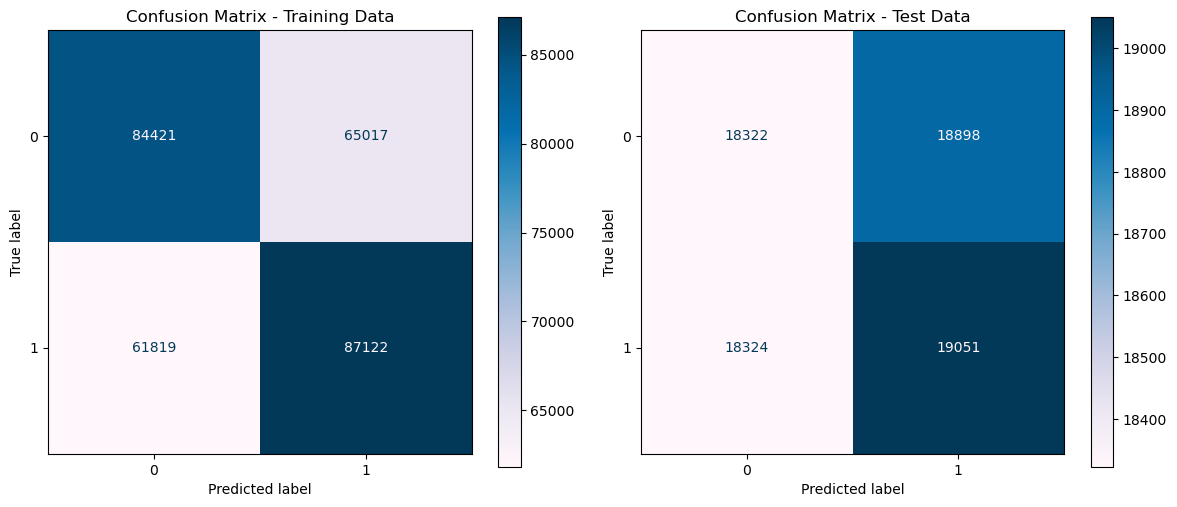

In [97]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix for training data
train_matrix = ConfusionMatrixDisplay.from_estimator(best_dt, X_train, y_train, cmap='PuBu', ax=axes[0])
train_matrix.ax_.set_title('Confusion Matrix - Training Data')

# Plot confusion matrix for test data
test_matrix = ConfusionMatrixDisplay.from_estimator(best_dt, X_test, y_test, cmap='PuBu', ax=axes[1])
test_matrix.ax_.set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()

### Simpan ke dalam table komparasi

In [113]:
# Create function to create reports
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
    # Calculate F1 scores
    score_reports = {
        'Recall Train Set': f1_score(y_train, y_pred_train),
        'Recall Test Set': f1_score(y_test, y_pred_test),
    }

    # Calculate confusion matrices for train and test sets
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    # Extract false negatives from the confusion matrices and add to the report
    score_reports['False Negative Train'] = cm_train[1, 0]
    score_reports['False Negative Test'] = cm_test[1, 0]

    # Store the report in the dictionary with the specified model name
    all_reports[name] = score_reports
    return all_reports

all_reports = {}
all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Decission Tree without Tuning')

pd.DataFrame(all_reports)

,Decission Tree without Tuning
Recall Train Set,1.000000
Recall Test Set,0.501031
False Negative Train,0.000000
False Negative Test,18670.000000


In [114]:
# Add results to the report
all_reports = performance_report(all_reports, y_train, y_pred_train_tuned, y_test, y_pred_test_tuned, 'Decission Tree with Tuning')
pd.DataFrame(all_reports)

,Decission Tree without Tuning,Decission Tree with Tuning
Recall Train Set,1.000000,0.578730
Recall Test Set,0.501031,0.505841
False Negative Train,0.000000,61819.000000
False Negative Test,18670.000000,18324.000000


## BAB 10 - CONCLUSION

##### Dilihat dari hasil setelah di tuning, maka akhirnya di dapat hasil seperti di atas, walaupun performa nya buruk, tapi masih dalam range goodfit. Supaya performa dapat lebih baik mungkin perlu di uji coba dengan metode yang lain dan dengan mengurangi beberapa fitur yang uji korelasi nya tidak kuat dengan target. 

# BAB 11 -MODEL SAVING

In [101]:
# Save the best model
import pickle
with open('best_dt.pkl', 'wb') as model_file:
    pickle.dump(best_dt, model_file)

In [121]:
best_dt

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'Cholesterol',
                                                   'BloodPressure', 'HeartRate',
                                                   'BMI', 'MaxHeartRate',
                                                   'ST_Depression']),
                                                 ('cat_ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Diet',
                                                   'Medication',
                                                   'ChestPainType',
                                                   'ECGResults',
                                                   'ExerciseInducedAngina'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=15, max_features='sqrt',
                                        min_samples_leaf=5, min_samples_split=5,
                                        random_state=10))])

- Karena machine learning sering kali rentan terhadap overfitting, terutama model yang memiliki variansi tinggi seperti Decission Tree. maka bagging ini diciptakan.
Bagging menggunakan pendekatan ensemble dengan membuat banyak model yang berbeda dan menggabungkan hasilnya untuk mendapat prediksi yang lebih stabil

- Perbedaan random forest dengan algoritma yang lain yaitu : Random Forest menekankan pada pengurangan varians dengan melatih banyak model independen dan menggabungkannya, sedangkan Boosting berfokus pada pengurangan bias dengan melatih model secara sekuensial, di mana setiap model baru memperbaiki kesalahan model sebelumnya.

- Cross Validation sering digunakan dalam Hyperparameter Tuning untuk memilih model dengan performa terbaik sebelum digunakan pada data baru. Dan cross validation dapat digunakan untuk mengukur performa model secara lebih akurat dengan cara membagi data menjadi beberapa bagian untuk pelatihan dan pengujian secara bergantian.
Tujuannya yaitu untuk memastikan bahwa model tidak terlalu bergantung pada data tertentu (mengurangi overfiting.)

---
$$-- END --$$
___